### Assignment 5 - Multiple-category classification and resampling

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we examine a dataset of car crashes.<br> 
It shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). 
About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time.<br> 

We will use the dataset to classify the severity of accidents. The target variable is 'MOST_SEVERE_INJURY'. Most variable names are self explanatory.

I will do most data preparation because we did not learn the coding in class. The point is not the coding, but the way I approach the data and the problems.



1. Import the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import dmba
from dmba import classificationSummary
import warnings; warnings.simplefilter('ignore')

2. Read in the dataset and display basic information about the dataset.

In [60]:
df = pd.read_csv("Crashes-clean.csv")

In [61]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [62]:
df.shape

(820587, 41)

In [63]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,820587.000000,1.990100e+05,820587.000000,820582.000000,820587.000000,818798.000000,818798.000000,818798.000000,818798.000000,818798.000000,818798.000000,818798.0,820587.000000,820587.000000,820587.000000,814943.000000,814943.000000
mean,28.406407,1.333011e+01,3689.797244,1243.864315,2.034926,0.189996,0.001191,0.019880,0.107123,0.061802,2.003064,0.0,13.198079,4.122314,6.644470,41.854883,-87.673564
std,6.163947,2.961594e+03,2886.635063,705.250678,0.452873,0.566149,0.037343,0.164965,0.422338,0.319448,1.156732,0.0,5.570181,1.980257,3.452024,0.335802,0.682412
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782532,-87.721755
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874817,-87.674177
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924404,-87.633419
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


3. Count the frequency distribution of the target variable 'MOST_SEVERE_INJURY'. Make a graph. What do you observe? What's the percentage of the majority category?

In [64]:
df['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     705823
NONINCAPACITATING INJURY     63696
REPORTED, NOT EVIDENT        34513
INCAPACITATING INJURY        13852
FATAL                          902
Name: MOST_SEVERE_INJURY, dtype: int64

<Axes: >

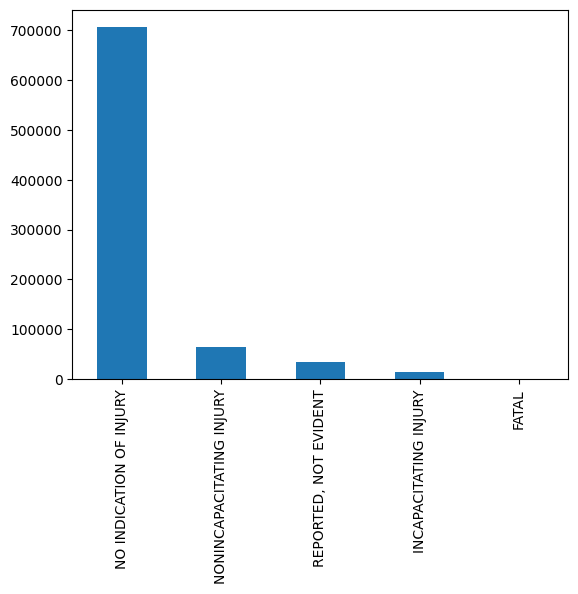

In [65]:
df['MOST_SEVERE_INJURY'].value_counts().plot(kind='bar')

In [66]:
(df[df['MOST_SEVERE_INJURY']=='NO INDICATION OF INJURY'].shape[0]/df.shape[0])*100

86.01440188547954

Findings: 
- The majority of cases fall into the category of 'No Indication of Injury'.
- The 'Fatal' category represents a very small percentage compared to the other categories.
- The percentage of the majority category ('No Indication of Injury') is 86.014% 

4. The variable 'DAMAGE' indicates the damage of a crash in terms of dollar amount, another measurement of crash outcome. We can check its relationship with ''MOST_SEVERE_INJURY' using cross-tabulation. How do you interpret the table?

In [67]:
pd.crosstab(df['MOST_SEVERE_INJURY'],df['DAMAGE'])

DAMAGE,$500 OR LESS,"$501 - $1,500","OVER $1,500"
MOST_SEVERE_INJURY,,,
FATAL,75,53,774
INCAPACITATING INJURY,2028,1400,10424
NO INDICATION OF INJURY,76623,202825,426375
NONINCAPACITATING INJURY,10070,7254,46372
"REPORTED, NOT EVIDENT",4584,5319,24610


- The table presents a breakdown of the frequency distribution of the variable 'MOST_SEVERE_INJURY' based on different levels of damage.
- Rows: Each row represents a category of 'MOST_SEVERE_INJURY'. The categories include 'FATAL', 'INCAPACITATING INJURY', 'NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY', and 'REPORTED, NOT EVIDENT'.
- Columns: The columns represent different levels of damage. The damage levels are categorized as '500 or less', '501−1500', and 'Over 1500'.
- Values: The values in the table indicate the count of occurrences for each combination of 'MOST_SEVERE_INJURY' category and damage level.
- For example, in the cell corresponding to 'FATAL' and '500 or less', the value is '75', indicating that there were 75 cases where the most severe injury was fatal and the damage incurred was 500 or less.

5. Next we explore variables that we may use to predict severity of crashes.<br>

In [68]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [69]:
# First, let's examine variables starting from 'POSTED_SPEED_LIMIT' to 'HIT_AND_RUN_I'
# We can use a loop to go through all of them.
for i in range(2,18):
    print(df.columns[i])
    df[df.columns[i]].value_counts()

POSTED_SPEED_LIMIT


30    603967
35     54799
25     51956
20     34211
15     29192
10     19199
40      7846
0       7438
45      5468
5       4718
55       810
50       243
3        199
9         96
39        83
99        66
60        50
1         41
24        37
2         28
32        19
65        18
34        14
33        13
11        11
26         9
6          7
36         7
70         6
7          5
14         4
12         3
22         3
29         3
23         2
8          2
38         2
4          2
18         2
31         2
49         1
63         1
16         1
44         1
62         1
46         1
Name: POSTED_SPEED_LIMIT, dtype: int64

TRAFFIC_CONTROL_DEVICE


NO CONTROLS                 466414
TRAFFIC SIGNAL              227453
STOP SIGN/FLASHER            81422
UNKNOWN                      32988
OTHER                         5574
LANE USE MARKING              1226
YIELD                         1210
OTHER REG. SIGN                910
OTHER WARNING SIGN             674
RAILROAD CROSSING GATE         532
PEDESTRIAN CROSSING SIGN       519
FLASHING CONTROL SIGNAL        331
DELINEATORS                    327
SCHOOL ZONE                    312
POLICE/FLAGMAN                 278
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               160
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

DEVICE_CONDITION


NO CONTROLS                 471834
FUNCTIONING PROPERLY        280924
UNKNOWN                      54921
OTHER                         6282
FUNCTIONING IMPROPERLY        3856
NOT FUNCTIONING               2389
WORN REFLECTIVE MATERIAL       286
MISSING                         95
Name: DEVICE_CONDITION, dtype: int64

WEATHER_CONDITION


CLEAR                       642981
RAIN                         72205
UNKNOWN                      45359
SNOW                         28387
CLOUDY/OVERCAST              24380
OTHER                         2610
FREEZING RAIN/DRIZZLE         1716
FOG/SMOKE/HAZE                1338
SLEET/HAIL                    1007
BLOWING SNOW                   444
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: WEATHER_CONDITION, dtype: int64

LIGHTING_CONDITION


DAYLIGHT                  524775
DARKNESS, LIGHTED ROAD    181618
DARKNESS                   39237
UNKNOWN                    37561
DUSK                       23654
DAWN                       13742
Name: LIGHTING_CONDITION, dtype: int64

FIRST_CRASH_TYPE


PARKED MOTOR VEHICLE            190703
REAR END                        183232
SIDESWIPE SAME DIRECTION        125235
TURNING                         117299
ANGLE                            89278
FIXED OBJECT                     38571
PEDESTRIAN                       19145
PEDALCYCLIST                     12334
SIDESWIPE OPPOSITE DIRECTION     11569
OTHER OBJECT                      8129
REAR TO FRONT                     7976
HEAD ON                           7009
REAR TO SIDE                      4737
OTHER NONCOLLISION                2587
REAR TO REAR                      1646
ANIMAL                             589
OVERTURNED                         502
TRAIN                               46
Name: FIRST_CRASH_TYPE, dtype: int64

TRAFFICWAY_TYPE


NOT DIVIDED                        356191
DIVIDED - W/MEDIAN (NOT RAISED)    131060
ONE-WAY                            104608
PARKING LOT                         55894
FOUR WAY                            52064
DIVIDED - W/MEDIAN BARRIER          46903
OTHER                               22452
ALLEY                               13570
T-INTERSECTION                      10482
UNKNOWN                              9548
CENTER TURN LANE                     5942
DRIVEWAY                             2665
RAMP                                 2566
UNKNOWN INTERSECTION TYPE            2415
Y-INTERSECTION                       1144
FIVE POINT, OR MORE                  1134
TRAFFIC ROUTE                         936
NOT REPORTED                          583
ROUNDABOUT                            262
L-INTERSECTION                        168
Name: TRAFFICWAY_TYPE, dtype: int64

LANE_CNT


2.0          91154
4.0          49588
1.0          32547
3.0           8678
0.0           8032
6.0           4502
5.0           1940
8.0           1908
7.0            184
10.0           162
99.0           108
9.0             66
11.0            30
12.0            29
20.0            15
22.0            13
15.0             7
16.0             7
14.0             5
30.0             5
40.0             4
60.0             3
21.0             3
25.0             2
100.0            2
902.0            1
24.0             1
80.0             1
218474.0         1
45.0             1
17.0             1
299679.0         1
19.0             1
400.0            1
13.0             1
1191625.0        1
35.0             1
433634.0         1
41.0             1
28.0             1
44.0             1
Name: LANE_CNT, dtype: int64

ALIGNMENT


STRAIGHT AND LEVEL       800693
STRAIGHT ON GRADE         10221
CURVE, LEVEL               5923
STRAIGHT ON HILLCREST      2149
CURVE ON GRADE             1236
CURVE ON HILLCREST          365
Name: ALIGNMENT, dtype: int64

ROADWAY_SURFACE_COND


DRY                604762
WET                109889
UNKNOWN             69788
SNOW OR SLUSH       28119
ICE                  5658
OTHER                2067
SAND, MUD, DIRT       304
Name: ROADWAY_SURFACE_COND, dtype: int64

ROAD_DEFECT


NO DEFECTS           659408
UNKNOWN              145173
RUT, HOLES             6067
OTHER                  4470
WORN SURFACE           3375
SHOULDER DEFECT        1477
DEBRIS ON ROADWAY       617
Name: ROAD_DEFECT, dtype: int64

REPORT_TYPE


NOT ON SCENE (DESK REPORT)    449137
ON SCENE                      346776
AMENDED                          240
Name: REPORT_TYPE, dtype: int64

CRASH_TYPE


NO INJURY / DRIVE AWAY              601381
INJURY AND / OR TOW DUE TO CRASH    219206
Name: CRASH_TYPE, dtype: int64

INTERSECTION_RELATED_I


Y    179232
N      8936
Name: INTERSECTION_RELATED_I, dtype: int64

NOT_RIGHT_OF_WAY_I


Y    34378
N     3462
Name: NOT_RIGHT_OF_WAY_I, dtype: int64

HIT_AND_RUN_I


Y    245893
N     11027
Name: HIT_AND_RUN_I, dtype: int64

5.1 About 'POSTED_SPEED_LIMIT'

In [71]:
# Based on the results, we need to further clean and prepare the data.
# First is 'POSTED_SPEED_LIMIT'. Based on our life knowledge, we probably never saw speed limit
# of 1, 2, 3 or 26. We do not have further information, but it might be reasonable to transform
# the irregular numbers to closest 5 or 10.
# To do that, we can use apply() method with a lambda function.
# The lambda function takes each value, divde it by 5, round the result and mulitply it by 5.
# This is not the most efficient way, but easier to show the idea.

df['POSTED_SPEED_LIMIT'] = df['POSTED_SPEED_LIMIT'].apply(lambda x: round(x/5)*5)

5.2 About 'LANE_CNT'

In [72]:
# The literal meaning seems to be the number of lanes involved in crashes.
# However, many numbers we cannot explain, i.e., all those greater than 12. 
# It seems not possible to have so many lanes.
# So, before we have more information about this variable, we will not use it.

5.3. About 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', and 'HIT_AND_RUN_I'.

In [73]:
# These three variables have many missing values, more than half.
# To maintain the data's power, we decide not to use these three variables.

5.4 About all other variables in this set.

In [74]:
# They are all categorical variables.
# We will include them in our analysis.

6. Another set of variables are about time. There are three coded variables 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', and 'CRASH_MONTH', indicating the time features of crashes. For instance, if the crashes happens on 1pm 4/8/2024, the variables will be 'CRASH_HOUR'-13, 'CRASH_DAY_OF_WEEK'-1, and 'CRASH_MONTH'-4. These variables can help to capture time-related features that have impacts on car crashes. For instance, crashes may be more likely to happen during night time or rush hours.<br>

I would like to add a variable 'Crash_Year' to control the yearly changes of car crashes and to show you how we can work with datetime variables.

In [75]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [76]:
df['Crash_Year'] = df['CRASH_DATE'].dt.year

In [77]:
# First, we will transform the 'CRASH_DATE' variable into Pandas Datetime datatype.
#df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Then we can create a new variable using accessor dt.year


In [78]:
df['Crash_Year'].unique()

array([2023, 2019, 2022, 2020, 2021, 2018, 2016, 2017, 2015, 2024, 2013,
       2014], dtype=int64)

7. The other variables include more details about the crash outcome and location information. We will not use them. The variable 'BEAT_OF_OCCURRENCE' shows to be numeric. Each number is referring to a patrol area of police. I think it might be a simplified indicator of locations. To use it, we need to transform it to a categorical variable.

In [79]:
df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].astype('category')

8. One last step is to correctly specify categorical variables. Some variables were assigned as numeric values, but their inherent meaning is categorical. For instance, the day of the month, we cannot say that day 30 is greater than day 1. So, we need to change their datatype to category. These variables include 'POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', and 'Crash_Year'.

In [80]:
df['POSTED_SPEED_LIMIT'] = df['POSTED_SPEED_LIMIT'].astype('category')
df['CRASH_HOUR'] = df['CRASH_HOUR'].astype('category')
df['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK'].astype('category')
df['CRASH_MONTH'] = df['CRASH_MONTH'].astype('category')
df['Crash_Year'] = df['Crash_Year'].astype('category')

9. Next we select the variables we need for analysis. The variables we keep for analysis include:<br>
'MOST_SEVERE_INJURY', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',        'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'Crash_Year'<br>

In [81]:
df1=df[['MOST_SEVERE_INJURY','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'Crash_Year']]

In [82]:
df1.head()

,MOST_SEVERE_INJURY,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,BEAT_OF_OCCURRENCE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Crash_Year
0,INCAPACITATING INJURY,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,225.0,19,3,9,2023
1,NO INDICATION OF INJURY,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,411.0,18,6,9,2023
2,NO INDICATION OF INJURY,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,1235.0,14,7,7,2023
3,NO INDICATION OF INJURY,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,1650.0,23,4,8,2023
4,NONINCAPACITATING INJURY,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,1654.0,12,6,8,2023


For these variables, missing values only constitute a small percentage. So, we decide to drop them. Drop observations with missing values

In [83]:
#Before dropping
df1.isnull().sum()

MOST_SEVERE_INJURY        1801
POSTED_SPEED_LIMIT           0
TRAFFIC_CONTROL_DEVICE       0
DEVICE_CONDITION             0
WEATHER_CONDITION            0
LIGHTING_CONDITION           0
FIRST_CRASH_TYPE             0
TRAFFICWAY_TYPE              0
ALIGNMENT                    0
ROADWAY_SURFACE_COND         0
ROAD_DEFECT                  0
BEAT_OF_OCCURRENCE           5
CRASH_HOUR                   0
CRASH_DAY_OF_WEEK            0
CRASH_MONTH                  0
Crash_Year                   0
dtype: int64

In [84]:
df1.dropna(axis=0, inplace = True)

C:\Users\siris\AppData\Local\Temp\ipykernel_9612\1569235794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0, inplace = True)


In [85]:
#After dropping
df1.isnull().sum()

MOST_SEVERE_INJURY        0
POSTED_SPEED_LIMIT        0
TRAFFIC_CONTROL_DEVICE    0
DEVICE_CONDITION          0
WEATHER_CONDITION         0
LIGHTING_CONDITION        0
FIRST_CRASH_TYPE          0
TRAFFICWAY_TYPE           0
ALIGNMENT                 0
ROADWAY_SURFACE_COND      0
ROAD_DEFECT               0
BEAT_OF_OCCURRENCE        0
CRASH_HOUR                0
CRASH_DAY_OF_WEEK         0
CRASH_MONTH               0
Crash_Year                0
dtype: int64

In [86]:
df1.shape

(818781, 16)

9. Next we split train and test datasets (Validation dataset approach).

Prepare X and y.

In [87]:
X = df1.drop('MOST_SEVERE_INJURY', axis = 1)

In [88]:
y = df1[['MOST_SEVERE_INJURY']]

Turn all variables in X to dummy variables.

In [89]:
X = pd.get_dummies(X, drop_first = True)

In [90]:
X.shape

(818781, 435)

In [91]:
X.head()

,POSTED_SPEED_LIMIT_5,POSTED_SPEED_LIMIT_10,POSTED_SPEED_LIMIT_15,POSTED_SPEED_LIMIT_20,POSTED_SPEED_LIMIT_25,POSTED_SPEED_LIMIT_30,POSTED_SPEED_LIMIT_35,POSTED_SPEED_LIMIT_40,POSTED_SPEED_LIMIT_45,POSTED_SPEED_LIMIT_50,...,Crash_Year_2015,Crash_Year_2016,Crash_Year_2017,Crash_Year_2018,Crash_Year_2019,Crash_Year_2020,Crash_Year_2021,Crash_Year_2022,Crash_Year_2023,Crash_Year_2024
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Split the dataset to train and test.

# For KNN

Note: I am taking 10% of the actual dataset to predict the KNN model, as the whole dataset was taking longer time for predicting the results (More than 2-3 hours). For the remaining models, I am using the whole dataset.

In [92]:
df1.shape

(818781, 16)

In [93]:
df_sample = df1.sample(frac=0.1)

In [94]:
df_sample.shape

(81878, 16)

In [95]:
X_sample = df_sample.drop('MOST_SEVERE_INJURY', axis = 1)
y_sample = df_sample[['MOST_SEVERE_INJURY']]

In [96]:
X_sample.shape
y_sample.shape

(81878, 15)

(81878, 1)

In [97]:
X_sample = pd.get_dummies(X_sample, drop_first = True)

In [98]:
X_sample.shape
y_sample.shape

(81878, 435)

(81878, 1)

In [99]:
# Split the dataset into training vs. testing
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

In [100]:
X_train_sample.shape
X_test_sample.shape

(57314, 435)

(24564, 435)

In [101]:
y_train_sample.shape
y_test_sample.shape

(57314, 1)

(24564, 1)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)

In [104]:
knn.fit(X_train_sample, y_train_sample)

C:\Users\siris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [105]:
knn_pred = knn.predict(X_test_sample)

In [143]:
classificationSummary(y_test_sample, knn_pred)

Confusion Matrix (Accuracy 0.8587)

       Prediction
Actual     0     1     2     3     4
     0     0     0    21     0     0
     1     0     4   370    20     1
     2     0    19 21012   135    31
     3     0     7  1770    72    12
     4     0     3  1058    25     4


In [153]:
knn_conf_matrix_multiclass = multilabel_confusion_matrix(y_test_sample, knn_pred,
          labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY",
                 "FATAL"])

- Class 0 : FATAL
- Class 1 : INCAPACITATING INJURY
- Class 2 : NO INDICATION OF INJURY
- Class 3 : NONINCAPACITATING INJURY
- Class 4 : REPORTED, NOT EVIDENT
*** 
- Rows: Each row represents the actual class of MOST_SEVERE_INJURY categories
- Columns: Each column represents the predicted class of MOST_SEVERE_INJURY categories
- Values: The values in the table indicate the count of data points that fall into each combination of actual and predicted classes.

In [146]:
labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY",
                 "FATAL"]

In [170]:
def confusion_mat(multiclass_confusion_matrix):
    for i, j in enumerate(multiclass_confusion_matrix):
        print(labels[i])
        print(j)
        print('True Negative', multiclass_confusion_matrix[i][0,0])
        print('True Positive', multiclass_confusion_matrix[i][1,1])
        print('False Negative', multiclass_confusion_matrix[i][1,0])
        print('False Positive', multiclass_confusion_matrix[i][0,1])
        print('*******************************')

In [171]:
confusion_mat(knn_conf_matrix_multiclass)

NO INDICATION OF INJURY
[[  148  3219]
 [  185 21012]]
True Negative 148
True Positive 21012
False Negative 185
False Positive 3219
*******************************
NONINCAPACITATING INJURY
[[22523   180]
 [ 1789    72]]
True Negative 22523
True Positive 72
False Negative 1789
False Positive 180
*******************************
REPORTED, NOT EVIDENT
[[23430    44]
 [ 1086     4]]
True Negative 23430
True Positive 4
False Negative 1086
False Positive 44
*******************************
INCAPACITATING INJURY
[[24140    29]
 [  391     4]]
True Negative 24140
True Positive 4
False Negative 391
False Positive 29
*******************************
FATAL
[[24543     0]
 [   21     0]]
True Negative 24543
True Positive 0
False Negative 21
False Positive 0
*******************************


The Accuracy of the KNN Model is 85.87%

# LDA, QDA and NB

In [145]:
# Split the dataset into training vs. testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
X_train.shape
X_test.shape

(573146, 435)

(245635, 435)

In [110]:
y_train.shape
y_test.shape

(573146, 1)

(245635, 1)

10. Next we will fit different classifiers: KNN, LDA, QDA and NB.

10.1 Import classifier modules

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

10.2 Initiate the classifiers

In [113]:
# Initialize the model
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()

10.3 Fit the KNN using the training dataset and get the accuracy score and confusion matrix for the test dataset.<br>
NOTE: It will take <b>a long time</b> (more than 30 minutes on my computer) to run the prediction. You may want to leave the program run and come back later for the results.

How to read the confusion matrix?

In [114]:
# knn_res = knn.fit(X_train,y_train)
# knn_pred = knn_res.predict(X_test)
# knn_accuracy = accuracy_score(y_test, knn_pred)
# knn_conf_matrix = confusion_matrix(y_test, knn_pred)
# print('Accuracy:',knn_accuracy,'\n')
# print("-------------Confusion Matrix-------------")
# print(knn_conf_matrix)

In [115]:
# knn_conf_matrix_multiclass = multilabel_confusion_matrix(y_test, knn_pred, labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY", "FATAL"])
# knn_conf_matrix_multiclass

10.4. Repeat for LDA.

In [138]:
lda_res = lda.fit(X_train,y_train)
lda_pred = lda_res.predict(X_test)
classificationSummary(y_test, lda_pred)

C:\Users\siris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual      0      1      2      3      4
     0     11     48    187     10      0
     1     51    974   2784    371      0
     2    187    677 209666   1207      0
     3    152   2942  14190   1826      0
     4     31    924   8980    417      0


In [173]:
lda_conf_matrix_multiclass = multilabel_confusion_matrix(y_test, lda_pred,
          labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY",
                 "FATAL"])

In [172]:
confusion_mat(lda_conf_matrix_multiclass)

NO INDICATION OF INJURY
[[  7757  26141]
 [  2071 209666]]
True Negative 7757
True Positive 209666
False Negative 2071
False Positive 26141
*******************************
NONINCAPACITATING INJURY
[[224520   2005]
 [ 17284   1826]]
True Negative 224520
True Positive 1826
False Negative 17284
False Positive 2005
*******************************
REPORTED, NOT EVIDENT
[[235283      0]
 [ 10352      0]]
True Negative 235283
True Positive 0
False Negative 10352
False Positive 0
*******************************
INCAPACITATING INJURY
[[236864   4591]
 [  3206    974]]
True Negative 236864
True Positive 974
False Negative 3206
False Positive 4591
*******************************
FATAL
[[244958    421]
 [   245     11]]
True Negative 244958
True Positive 11
False Negative 245
False Positive 421
*******************************


The Accuracy of the LDA Model is 86.50%

10.5 Repeat for QDA. What is your observation?

In [137]:
qda_res = qda.fit(X_train,y_train)
qda_pred = qda_res.predict(X_test)
classificationSummary(y_test, qda_pred)

C:\Users\siris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\siris\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion Matrix (Accuracy 0.0316)

       Prediction
Actual      0      1      2      3      4
     0    219      7      2      6     22
     1   3463    132     51     89    445
     2 172210   5345   5764   3699  24719
     3  15795    570    210    437   2098
     4   8534    275    123    204   1216


In [174]:
qda_conf_matrix_multiclass = multilabel_confusion_matrix(y_test, qda_pred,
          labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY",
                 "FATAL"])

In [175]:
confusion_mat(qda_conf_matrix_multiclass)

NO INDICATION OF INJURY
[[ 33512    386]
 [205973   5764]]
True Negative 33512
True Positive 5764
False Negative 205973
False Positive 386
*******************************
NONINCAPACITATING INJURY
[[222527   3998]
 [ 18673    437]]
True Negative 222527
True Positive 437
False Negative 18673
False Positive 3998
*******************************
REPORTED, NOT EVIDENT
[[207999  27284]
 [  9136   1216]]
True Negative 207999
True Positive 1216
False Negative 9136
False Positive 27284
*******************************
INCAPACITATING INJURY
[[235258   6197]
 [  4048    132]]
True Negative 235258
True Positive 132
False Negative 4048
False Positive 6197
*******************************
FATAL
[[ 45377 200002]
 [    37    219]]
True Negative 45377
True Positive 219
False Negative 37
False Positive 200002
*******************************


The Accuracy of the LDA Model is 3.16%

10.6 Repeat for Naive Bayes. What is your observation?

In [140]:
gnb_res = gnb.fit(X_train,y_train)
gnb_pred = gnb_res.predict(X_test)
classificationSummary(y_test, gnb_pred)

C:\Users\siris\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Accuracy 0.0561)

       Prediction
Actual      0      1      2      3      4
     0    220     21      2      7      6
     1   3471    371     63    121    154
     2 173733  13522  12167   3813   8502
     3  15841   1681    288    525    775
     4   8566    788    239    252    507


In [176]:
gnb_conf_matrix_multiclass = multilabel_confusion_matrix(y_test, gnb_pred,
          labels=["NO INDICATION OF INJURY", "NONINCAPACITATING INJURY", "REPORTED, NOT EVIDENT", "INCAPACITATING INJURY",
                 "FATAL"])

In [177]:
confusion_mat(gnb_conf_matrix_multiclass)

NO INDICATION OF INJURY
[[ 33306    592]
 [199570  12167]]
True Negative 33306
True Positive 12167
False Negative 199570
False Positive 592
*******************************
NONINCAPACITATING INJURY
[[222332   4193]
 [ 18585    525]]
True Negative 222332
True Positive 525
False Negative 18585
False Positive 4193
*******************************
REPORTED, NOT EVIDENT
[[225846   9437]
 [  9845    507]]
True Negative 225846
True Positive 507
False Negative 9845
False Positive 9437
*******************************
INCAPACITATING INJURY
[[225443  16012]
 [  3809    371]]
True Negative 225443
True Positive 371
False Negative 3809
False Positive 16012
*******************************
FATAL
[[ 43768 201611]
 [    36    220]]
True Negative 43768
True Positive 220
False Negative 36
False Positive 201611
*******************************


The Accuracy of the Naive Bayes Model is 5.61%